In [1]:
# Importer les bibliothèques

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
# Préparer le jeu de données 

In [4]:
from PIL import Image
import os
import numpy as np
from sklearn.model_selection import train_test_split

# Charger les images originales
data_directory = "C:/Users/Utilisateur/Documents/Python/python_Ynnov/Minst/mes_images"
image_files = os.listdir(data_directory)
images = []
labels = [0,1,2,3,4,5]

for filename in image_files:
    if filename.endswith(".jpg"):
        img = Image.open(os.path.join(data_directory, filename)).convert('L')  # Convertir en niveaux de gris
        images.append(img)
        
# Redimensionner les images et appliquer la rotation pour augmenter les données
augmented_images = []
augmented_labels = []

for iteration in range(200) :
    for i, img in enumerate(images):
        for angle in range(-20, 20):
            rotated_img = img.rotate(angle, resample=Image.BILINEAR, fillcolor=255)  # Appliquer la rotation
            resized_img = rotated_img.resize((28, 28), Image.LANCZOS)  # Redimensionner l'image
            augmented_images.append(np.array(resized_img))  # Convertir en tableau numpy
            augmented_labels.append(labels[i])

# Partitionner les données
X_train, X_test, y_train, y_test = train_test_split(augmented_images, augmented_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Convertir en tableaux numpy
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Normaliser les valeurs des pixels (0-1)
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Ajouter une dimention par canal d'image
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Afficher les dimensions des ensembles de données
print("Dimensions des ensembles d'entraînement, de validation et de test :")
print("Entraînement :", X_train.shape, y_train.shape)
print("Validation   :", X_val.shape, y_val.shape)
print("Test         :", X_test.shape, y_test.shape)

Dimensions des ensembles d'entraînement, de validation et de test :
Entraînement : (38400, 28, 28, 1) (38400,)
Validation   : (4800, 28, 28, 1) (4800,)
Test         : (4800, 28, 28, 1) (4800,)


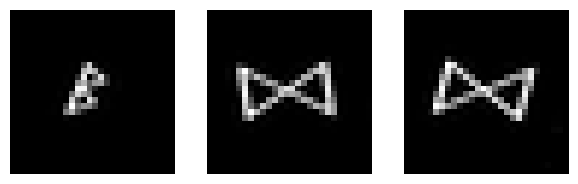

cathégorie :
1
cathégorie :
3
cathégorie :
3
int32


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

X_new = X_test[:3]
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

y_new = y_test[:3]
for i in range(3) :
    print ("cathégorie :") 
    print(y_new[i])

print(y_test.dtype)

In [6]:
# Visualiser le jeu de donnees

In [7]:
# Architecture du CNN

In [8]:
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=6, activation='softmax'),
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [10]:
# Entraîner le modèle

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test)


Epoch 1/10


1200/1200 [==============================] - 147s 119ms/step - loss: 0.1868 - accuracy: 0.9228 - val_loss: 1.2318e-08 - val_accuracy: 1.0000
Epoch 2/10
1200/1200 [==============================] - 161s 135ms/step - loss: 0.0093 - accuracy: 0.9966 - val_loss: 2.8411e-08 - val_accuracy: 1.0000
Epoch 3/10
1200/1200 [==============================] - 181s 151ms/step - loss: 0.0270 - accuracy: 0.9924 - val_loss: 3.8743e-09 - val_accuracy: 1.0000
Epoch 4/10
1200/1200 [==============================] - 188s 157ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
1200/1200 [==============================] - 201s 167ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
1200/1200 [==============================] - 217s 180ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
1200/1200 [==============================] - 208s 173ms/step - loss: 0.005

In [12]:
# Courbe d'apprentissage

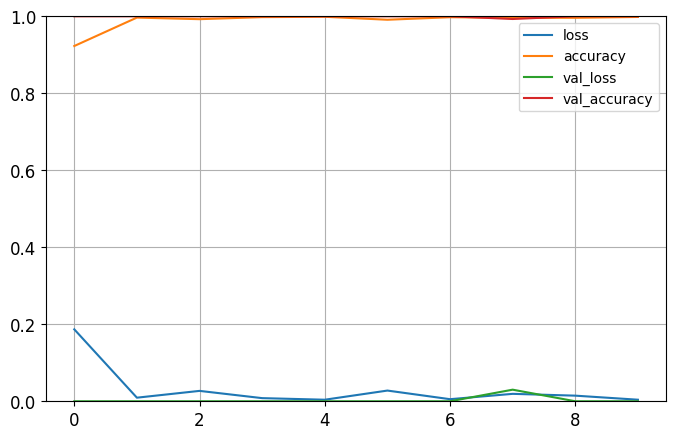

In [13]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [14]:
# Prédictions 

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 222ms/step


array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

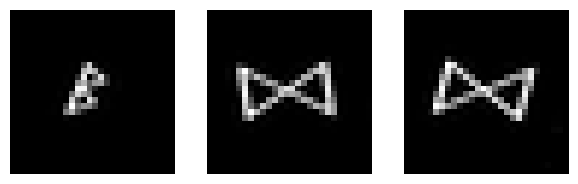

In [16]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()